In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

05/19/2020 17:44:36 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 17:44:36 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 17:44:37 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 17:44:38 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 17:44:38 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

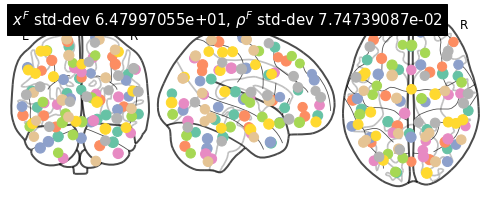

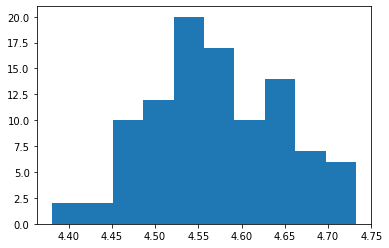

(<nilearn.plotting.displays.OrthoProjector at 0x7fa99ac00cd0>,
 tensor([[-51.0867, -25.8971,  15.0760],
         [ 39.1926, -67.7225, -27.5347],
         [ 50.3522,   9.0134,  32.8792],
         [ 27.1815,  60.7760,  -9.9504],
         [ -0.7243, -51.3460,  28.4884],
         [-45.0283,  25.9265,  -1.7674],
         [-23.1946, -38.9478, -32.6224],
         [-11.9139,  15.6636,  62.0653],
         [ 61.3095, -27.4451,  -8.9571],
         [ 17.9093, -47.2121, -14.3531],
         [  1.1109,  40.0508,  16.6067],
         [-13.7145, -92.6640,  13.1525],
         [ 34.4691,  11.5734, -38.5858],
         [-25.6360, -11.6841, -22.4970],
         [ 36.9443, -60.4396,  43.4988],
         [-40.5970, -60.9593,  36.7178],
         [ 45.7873,  44.8178,  -1.0051],
         [ 20.7513,  13.0602,   5.9452],
         [ 20.5728, -78.9774, -42.2325],
         [-38.3344,  47.1977, -10.7003],
         [-60.2086, -16.2928, -10.3206],
         [ 33.7407,  19.0173,  51.3736],
         [-13.2697, -43.5754,  67.6

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

552

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

05/19/2020 17:45:56 [Epoch 1] (7600ms) Posterior free-energy 9.67191245e+09 = KL from prior 1.84603500e+07 - log-likelihood -9.65345485e+09
05/19/2020 17:45:56 Saving checkpoint...
05/19/2020 17:46:04 [Epoch 2] (7472ms) Posterior free-energy 9.38975027e+09 = KL from prior 5.33027688e+05 - log-likelihood -9.38921779e+09
05/19/2020 17:46:11 [Epoch 3] (7379ms) Posterior free-energy 9.21724006e+09 = KL from prior 4.67266094e+05 - log-likelihood -9.21677619e+09
05/19/2020 17:46:18 [Epoch 4] (7374ms) Posterior free-energy 9.10098944e+09 = KL from prior 4.48938219e+05 - log-likelihood -9.10054298e+09
05/19/2020 17:46:26 [Epoch 5] (7391ms) Posterior free-energy 9.01632205e+09 = KL from prior 4.41724812e+05 - log-likelihood -9.01588070e+09
05/19/2020 17:46:33 [Epoch 6] (7374ms) Posterior free-energy 8.95362458e+09 = KL from prior 4.40243500e+05 - log-likelihood -8.95318323e+09
05/19/2020 17:46:41 [Epoch 7] (7440ms) Posterior free-energy 8.90389504e+09 = KL from prior 4.43749344e+05 - log-likeli

Epoch   502: reducing learning rate of group 0 to 5.0000e-03.
Epoch   502: reducing learning rate of group 1 to 5.0000e-03.
Epoch   502: reducing learning rate of group 2 to 5.0000e-03.
Epoch   502: reducing learning rate of group 3 to 5.0000e-03.


05/19/2020 18:47:15 [Epoch 504] (7309ms) Posterior free-energy 6.22210355e+09 = KL from prior 2.08943875e+06 - log-likelihood -6.22001562e+09
05/19/2020 18:47:22 [Epoch 505] (7277ms) Posterior free-energy 6.17725440e+09 = KL from prior 2.03473825e+06 - log-likelihood -6.17522074e+09
05/19/2020 18:47:29 [Epoch 506] (7297ms) Posterior free-energy 6.17499290e+09 = KL from prior 2.00750038e+06 - log-likelihood -6.17298534e+09
05/19/2020 18:47:36 [Epoch 507] (7278ms) Posterior free-energy 6.17430579e+09 = KL from prior 1.99553175e+06 - log-likelihood -6.17231053e+09
05/19/2020 18:47:44 [Epoch 508] (7284ms) Posterior free-energy 6.17365606e+09 = KL from prior 1.98763162e+06 - log-likelihood -6.17166950e+09
05/19/2020 18:47:51 [Epoch 509] (7296ms) Posterior free-energy 6.17312870e+09 = KL from prior 1.98189950e+06 - log-likelihood -6.17114573e+09
05/19/2020 18:47:58 [Epoch 510] (7286ms) Posterior free-energy 6.17266995e+09 = KL from prior 1.97345625e+06 - log-likelihood -6.17069670e+09
05/19/

Epoch   708: reducing learning rate of group 0 to 2.5000e-03.
Epoch   708: reducing learning rate of group 1 to 2.5000e-03.
Epoch   708: reducing learning rate of group 2 to 2.5000e-03.
Epoch   708: reducing learning rate of group 3 to 2.5000e-03.


05/19/2020 19:12:18 [Epoch 710] (7300ms) Posterior free-energy 6.15230720e+09 = KL from prior 2.05297562e+06 - log-likelihood -6.15025510e+09
05/19/2020 19:12:26 [Epoch 711] (7300ms) Posterior free-energy 6.14885478e+09 = KL from prior 2.03958362e+06 - log-likelihood -6.14681600e+09
05/19/2020 19:12:33 [Epoch 712] (7289ms) Posterior free-energy 6.14852352e+09 = KL from prior 2.03749888e+06 - log-likelihood -6.14648576e+09
05/19/2020 19:12:40 [Epoch 713] (7265ms) Posterior free-energy 6.14831360e+09 = KL from prior 2.03362712e+06 - log-likelihood -6.14627789e+09
05/19/2020 19:12:48 [Epoch 714] (7290ms) Posterior free-energy 6.14826650e+09 = KL from prior 2.03386400e+06 - log-likelihood -6.14623027e+09
05/19/2020 19:12:55 [Epoch 715] (7273ms) Posterior free-energy 6.14821530e+09 = KL from prior 2.02667088e+06 - log-likelihood -6.14618726e+09
05/19/2020 19:13:02 [Epoch 716] (7452ms) Posterior free-energy 6.14805914e+09 = KL from prior 2.02466125e+06 - log-likelihood -6.14603469e+09
05/19/

Epoch   750: reducing learning rate of group 0 to 1.2500e-03.
Epoch   750: reducing learning rate of group 1 to 1.2500e-03.
Epoch   750: reducing learning rate of group 2 to 1.2500e-03.
Epoch   750: reducing learning rate of group 3 to 1.2500e-03.


05/19/2020 19:17:27 [Epoch 752] (7432ms) Posterior free-energy 6.14682010e+09 = KL from prior 2.04668100e+06 - log-likelihood -6.14477312e+09
05/19/2020 19:17:34 [Epoch 753] (7377ms) Posterior free-energy 6.14659379e+09 = KL from prior 2.05741788e+06 - log-likelihood -6.14453555e+09
05/19/2020 19:17:42 [Epoch 754] (7420ms) Posterior free-energy 6.14654618e+09 = KL from prior 2.04952450e+06 - log-likelihood -6.14449562e+09
05/19/2020 19:17:49 [Epoch 755] (7336ms) Posterior free-energy 6.14642483e+09 = KL from prior 2.04741850e+06 - log-likelihood -6.14437632e+09
05/19/2020 19:17:57 [Epoch 756] (7351ms) Posterior free-energy 6.14649088e+09 = KL from prior 2.10240275e+06 - log-likelihood -6.14438861e+09
05/19/2020 19:18:04 [Epoch 757] (7337ms) Posterior free-energy 6.14640026e+09 = KL from prior 2.09915025e+06 - log-likelihood -6.14430259e+09
05/19/2020 19:18:11 [Epoch 758] (7280ms) Posterior free-energy 6.14628762e+09 = KL from prior 2.05858525e+06 - log-likelihood -6.14422886e+09
05/19/

Epoch   781: reducing learning rate of group 0 to 6.2500e-04.
Epoch   781: reducing learning rate of group 1 to 6.2500e-04.
Epoch   781: reducing learning rate of group 2 to 6.2500e-04.
Epoch   781: reducing learning rate of group 3 to 6.2500e-04.


05/19/2020 19:21:13 [Epoch 783] (7306ms) Posterior free-energy 6.14571008e+09 = KL from prior 2.02476538e+06 - log-likelihood -6.14368614e+09
05/19/2020 19:21:20 [Epoch 784] (7498ms) Posterior free-energy 6.14566298e+09 = KL from prior 2.01966262e+06 - log-likelihood -6.14364211e+09
05/19/2020 19:21:28 [Epoch 785] (7489ms) Posterior free-energy 6.14556314e+09 = KL from prior 2.01861650e+06 - log-likelihood -6.14354432e+09
05/19/2020 19:21:35 [Epoch 786] (7495ms) Posterior free-energy 6.14552576e+09 = KL from prior 2.01753800e+06 - log-likelihood -6.14350746e+09
05/19/2020 19:21:43 [Epoch 787] (7483ms) Posterior free-energy 6.14557338e+09 = KL from prior 2.01560825e+06 - log-likelihood -6.14355763e+09
05/19/2020 19:21:50 [Epoch 788] (7459ms) Posterior free-energy 6.14549760e+09 = KL from prior 2.01469112e+06 - log-likelihood -6.14348390e+09
05/19/2020 19:21:57 [Epoch 789] (7249ms) Posterior free-energy 6.14552883e+09 = KL from prior 2.01331025e+06 - log-likelihood -6.14351616e+09
05/19/

Epoch   806: reducing learning rate of group 0 to 3.1250e-04.
Epoch   806: reducing learning rate of group 1 to 3.1250e-04.
Epoch   806: reducing learning rate of group 2 to 3.1250e-04.
Epoch   806: reducing learning rate of group 3 to 3.1250e-04.


05/19/2020 19:24:15 [Epoch 808] (7225ms) Posterior free-energy 6.14525542e+09 = KL from prior 1.99755762e+06 - log-likelihood -6.14325811e+09
05/19/2020 19:24:22 [Epoch 809] (7233ms) Posterior free-energy 6.14513971e+09 = KL from prior 1.99689688e+06 - log-likelihood -6.14314240e+09
05/19/2020 19:24:29 [Epoch 810] (7222ms) Posterior free-energy 6.14525901e+09 = KL from prior 1.99720150e+06 - log-likelihood -6.14326323e+09
05/19/2020 19:24:37 [Epoch 811] (7223ms) Posterior free-energy 6.14514483e+09 = KL from prior 1.99774688e+06 - log-likelihood -6.14314598e+09
05/19/2020 19:24:44 [Epoch 812] (7227ms) Posterior free-energy 6.14533120e+09 = KL from prior 1.99539325e+06 - log-likelihood -6.14333645e+09
05/19/2020 19:24:51 [Epoch 813] (7222ms) Posterior free-energy 6.14519040e+09 = KL from prior 1.99552150e+06 - log-likelihood -6.14319565e+09
05/19/2020 19:24:58 [Epoch 814] (7239ms) Posterior free-energy 6.14525696e+09 = KL from prior 1.99600025e+06 - log-likelihood -6.14326118e+09
05/19/

Epoch   827: reducing learning rate of group 0 to 1.5625e-04.
Epoch   827: reducing learning rate of group 1 to 1.5625e-04.
Epoch   827: reducing learning rate of group 2 to 1.5625e-04.
Epoch   827: reducing learning rate of group 3 to 1.5625e-04.


05/19/2020 19:26:47 [Epoch 829] (7238ms) Posterior free-energy 6.14511258e+09 = KL from prior 1.99099650e+06 - log-likelihood -6.14312243e+09
05/19/2020 19:26:54 [Epoch 830] (7236ms) Posterior free-energy 6.14507827e+09 = KL from prior 1.99005000e+06 - log-likelihood -6.14308813e+09
05/19/2020 19:27:01 [Epoch 831] (7230ms) Posterior free-energy 6.14517862e+09 = KL from prior 1.98797500e+06 - log-likelihood -6.14319002e+09
05/19/2020 19:27:09 [Epoch 832] (7233ms) Posterior free-energy 6.14509312e+09 = KL from prior 1.98919250e+06 - log-likelihood -6.14310349e+09
05/19/2020 19:27:16 [Epoch 833] (7208ms) Posterior free-energy 6.14510285e+09 = KL from prior 1.98879275e+06 - log-likelihood -6.14311475e+09
05/19/2020 19:27:23 [Epoch 834] (7221ms) Posterior free-energy 6.14501581e+09 = KL from prior 1.98881638e+06 - log-likelihood -6.14302669e+09
05/19/2020 19:27:30 [Epoch 835] (7218ms) Posterior free-energy 6.14504141e+09 = KL from prior 1.98870762e+06 - log-likelihood -6.14305382e+09
05/19/

Epoch   848: reducing learning rate of group 0 to 7.8125e-05.
Epoch   848: reducing learning rate of group 1 to 7.8125e-05.
Epoch   848: reducing learning rate of group 2 to 7.8125e-05.
Epoch   848: reducing learning rate of group 3 to 7.8125e-05.


05/19/2020 19:29:21 [Epoch 850] (7307ms) Posterior free-energy 6.14498714e+09 = KL from prior 1.98697612e+06 - log-likelihood -6.14300109e+09
05/19/2020 19:29:28 [Epoch 851] (7313ms) Posterior free-energy 6.14497843e+09 = KL from prior 1.98735038e+06 - log-likelihood -6.14299136e+09
05/19/2020 19:29:35 [Epoch 852] (7316ms) Posterior free-energy 6.14493696e+09 = KL from prior 1.98564900e+06 - log-likelihood -6.14295091e+09
05/19/2020 19:29:43 [Epoch 853] (7314ms) Posterior free-energy 6.14494003e+09 = KL from prior 1.98530375e+06 - log-likelihood -6.14295501e+09
05/19/2020 19:29:50 [Epoch 854] (7317ms) Posterior free-energy 6.14495539e+09 = KL from prior 1.98638425e+06 - log-likelihood -6.14296986e+09
05/19/2020 19:29:57 [Epoch 855] (7354ms) Posterior free-energy 6.14495130e+09 = KL from prior 1.98516475e+06 - log-likelihood -6.14296627e+09
05/19/2020 19:30:05 [Epoch 856] (7423ms) Posterior free-energy 6.14496973e+09 = KL from prior 1.98475112e+06 - log-likelihood -6.14298522e+09
05/19/

Epoch   878: reducing learning rate of group 0 to 3.9063e-05.
Epoch   878: reducing learning rate of group 1 to 3.9063e-05.
Epoch   878: reducing learning rate of group 2 to 3.9063e-05.
Epoch   878: reducing learning rate of group 3 to 3.9063e-05.


05/19/2020 19:32:59 [Epoch 880] (7219ms) Posterior free-energy 6.14494464e+09 = KL from prior 1.98333262e+06 - log-likelihood -6.14296115e+09
05/19/2020 19:33:06 [Epoch 881] (7232ms) Posterior free-energy 6.14498970e+09 = KL from prior 1.98274062e+06 - log-likelihood -6.14300621e+09
05/19/2020 19:33:13 [Epoch 882] (7225ms) Posterior free-energy 6.14490368e+09 = KL from prior 1.98273788e+06 - log-likelihood -6.14292122e+09
05/19/2020 19:33:21 [Epoch 883] (7226ms) Posterior free-energy 6.14487603e+09 = KL from prior 1.98344975e+06 - log-likelihood -6.14289357e+09
05/19/2020 19:33:28 [Epoch 884] (7233ms) Posterior free-energy 6.14496666e+09 = KL from prior 1.98263962e+06 - log-likelihood -6.14298470e+09
05/19/2020 19:33:35 [Epoch 885] (7276ms) Posterior free-energy 6.14501274e+09 = KL from prior 1.98195788e+06 - log-likelihood -6.14303027e+09
05/19/2020 19:33:42 [Epoch 886] (7230ms) Posterior free-energy 6.14485504e+09 = KL from prior 1.98381712e+06 - log-likelihood -6.14287053e+09
05/19/

Epoch   899: reducing learning rate of group 0 to 1.9531e-05.
Epoch   899: reducing learning rate of group 1 to 1.9531e-05.
Epoch   899: reducing learning rate of group 2 to 1.9531e-05.
Epoch   899: reducing learning rate of group 3 to 1.9531e-05.


05/19/2020 19:35:31 [Epoch 901] (7226ms) Posterior free-energy 6.14491699e+09 = KL from prior 1.98112262e+06 - log-likelihood -6.14293760e+09
05/19/2020 19:35:31 Saving checkpoint...
05/19/2020 19:35:38 [Epoch 902] (7229ms) Posterior free-energy 6.14496614e+09 = KL from prior 1.98218238e+06 - log-likelihood -6.14298470e+09
05/19/2020 19:35:45 [Epoch 903] (7225ms) Posterior free-energy 6.14488627e+09 = KL from prior 1.98184925e+06 - log-likelihood -6.14290483e+09
05/19/2020 19:35:53 [Epoch 904] (7244ms) Posterior free-energy 6.14489088e+09 = KL from prior 1.98132875e+06 - log-likelihood -6.14290944e+09
05/19/2020 19:36:00 [Epoch 905] (7236ms) Posterior free-energy 6.14487859e+09 = KL from prior 1.98121062e+06 - log-likelihood -6.14289715e+09
05/19/2020 19:36:07 [Epoch 906] (7241ms) Posterior free-energy 6.14495130e+09 = KL from prior 1.98156488e+06 - log-likelihood -6.14296934e+09
05/19/2020 19:36:14 [Epoch 907] (7238ms) Posterior free-energy 6.14489805e+09 = KL from prior 1.98157050e+0

Epoch   920: reducing learning rate of group 0 to 1.0000e-05.
Epoch   920: reducing learning rate of group 1 to 1.0000e-05.
Epoch   920: reducing learning rate of group 2 to 1.0000e-05.
Epoch   920: reducing learning rate of group 3 to 1.0000e-05.


05/19/2020 19:38:03 [Epoch 922] (7412ms) Posterior free-energy 6.14486886e+09 = KL from prior 1.98233638e+06 - log-likelihood -6.14288691e+09
05/19/2020 19:38:11 [Epoch 923] (7339ms) Posterior free-energy 6.14487808e+09 = KL from prior 1.98126050e+06 - log-likelihood -6.14289613e+09
05/19/2020 19:38:18 [Epoch 924] (7220ms) Posterior free-energy 6.14482483e+09 = KL from prior 1.98132325e+06 - log-likelihood -6.14284339e+09
05/19/2020 19:38:25 [Epoch 925] (7216ms) Posterior free-energy 6.14496512e+09 = KL from prior 1.98161588e+06 - log-likelihood -6.14298368e+09
05/19/2020 19:38:32 [Epoch 926] (7239ms) Posterior free-energy 6.14487091e+09 = KL from prior 1.98229638e+06 - log-likelihood -6.14288896e+09
05/19/2020 19:38:40 [Epoch 927] (7216ms) Posterior free-energy 6.14486272e+09 = KL from prior 1.98071638e+06 - log-likelihood -6.14288230e+09
05/19/2020 19:38:47 [Epoch 928] (7233ms) Posterior free-energy 6.14497792e+09 = KL from prior 1.98136525e+06 - log-likelihood -6.14299648e+09
05/19/

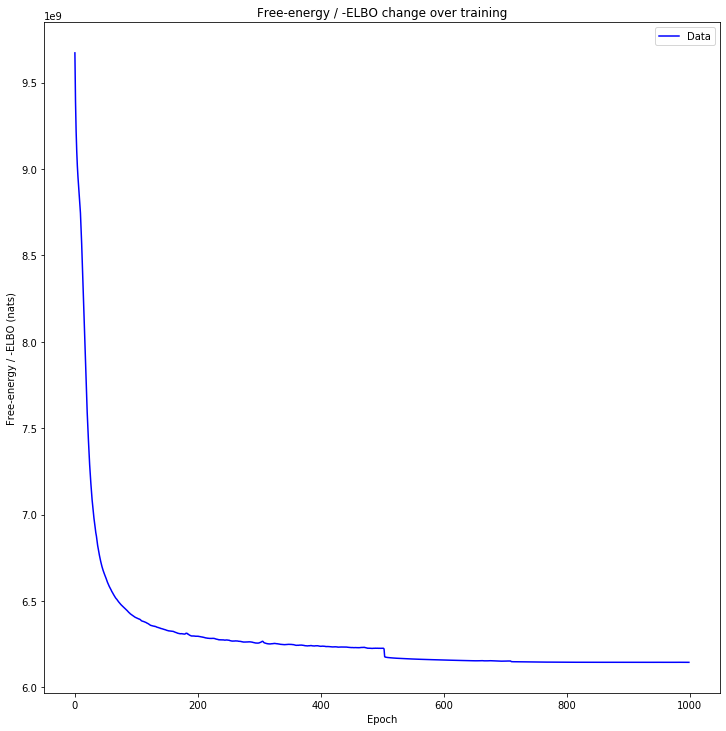

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


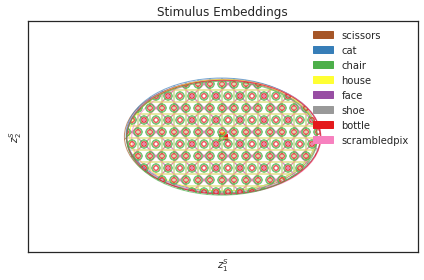

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


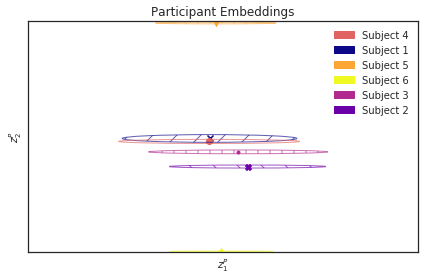

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    return task

05/19/2020 19:47:30 Plotting factors for Participant 2, run 4


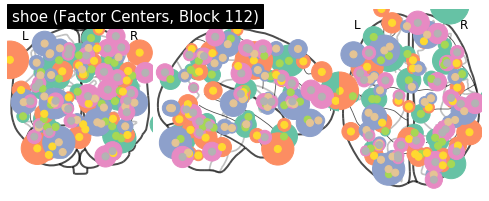

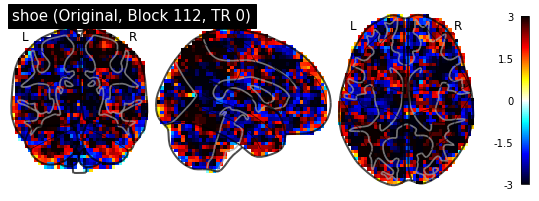

05/19/2020 19:47:32 Reconstruction Error (Frobenius Norm): 1.53177719e+02 out of 7.23707764e+02


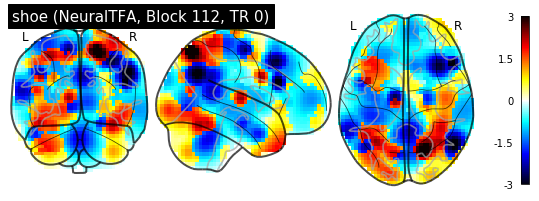

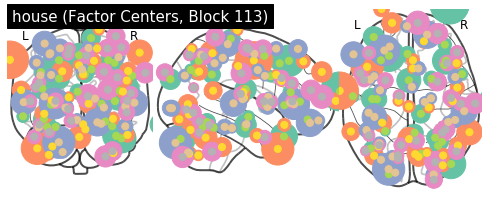

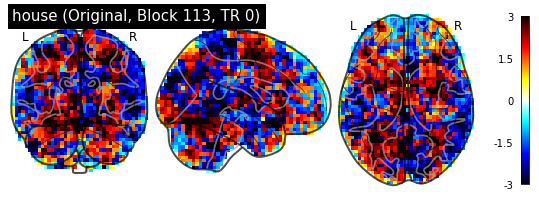

05/19/2020 19:47:35 Reconstruction Error (Frobenius Norm): 1.07829422e+02 out of 6.22529297e+02


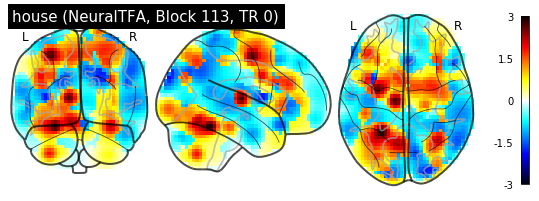

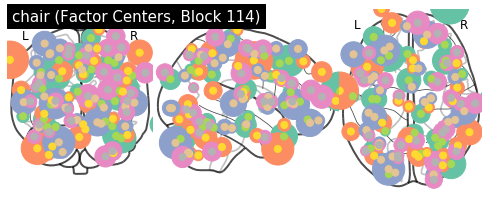

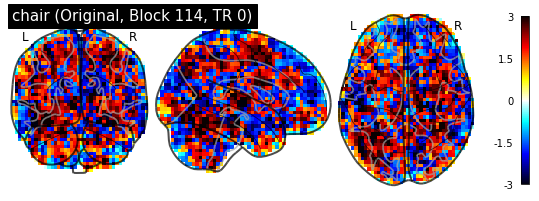

05/19/2020 19:47:38 Reconstruction Error (Frobenius Norm): 1.02708076e+02 out of 6.01799255e+02


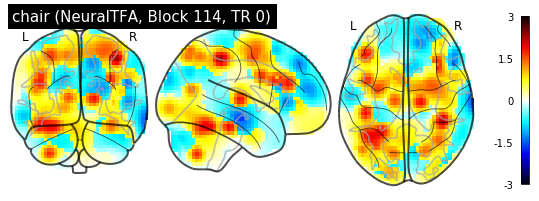

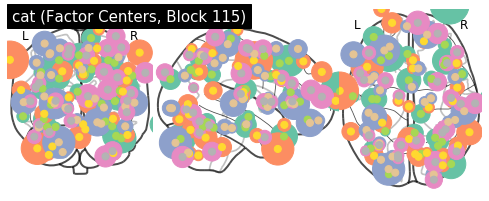

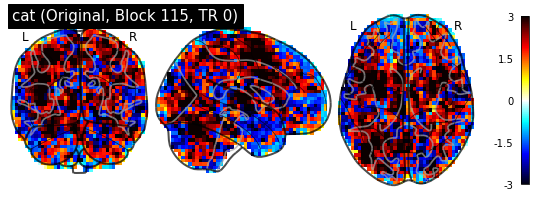

05/19/2020 19:47:41 Reconstruction Error (Frobenius Norm): 1.40105469e+02 out of 7.12348328e+02


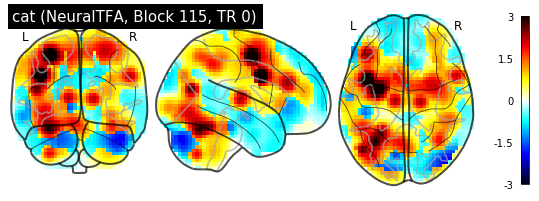

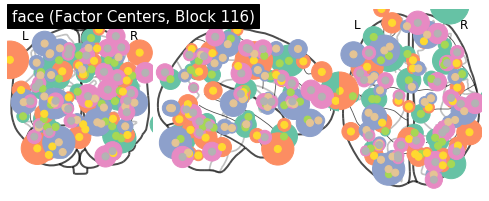

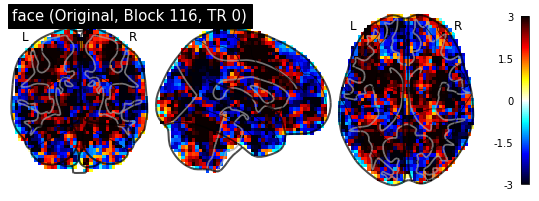

05/19/2020 19:47:44 Reconstruction Error (Frobenius Norm): 1.13395294e+02 out of 7.03281189e+02


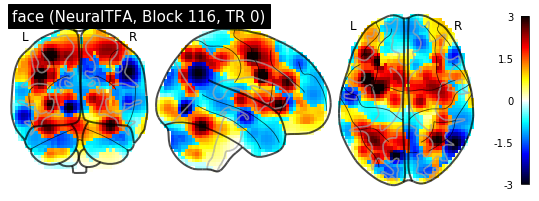

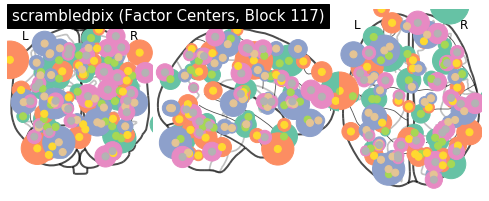

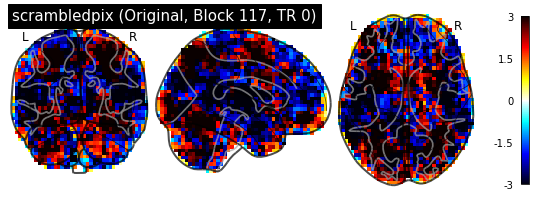

05/19/2020 19:47:47 Reconstruction Error (Frobenius Norm): 1.51233276e+02 out of 6.96191223e+02


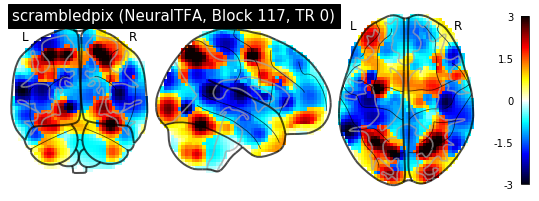

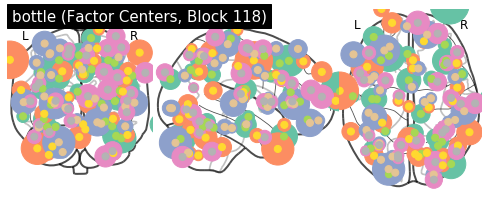

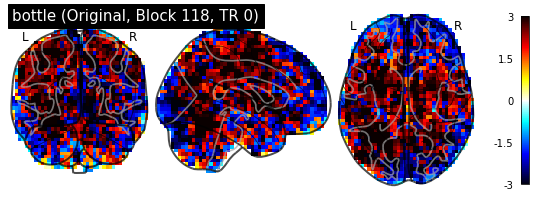

05/19/2020 19:47:50 Reconstruction Error (Frobenius Norm): 1.42751190e+02 out of 7.23002563e+02


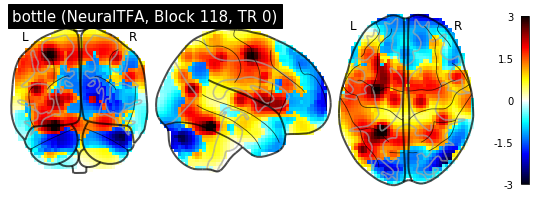

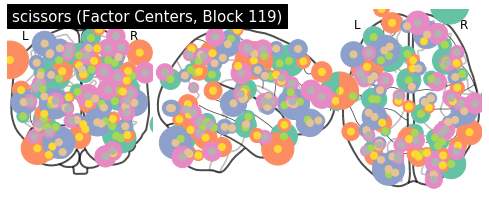

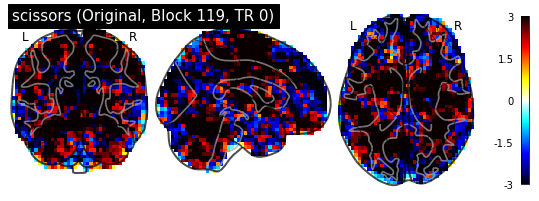

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
05/19/2020 19:47:53 Reconstruction Error (Frobenius Norm): 2.06518936e+02 out of 7.80366272e+02


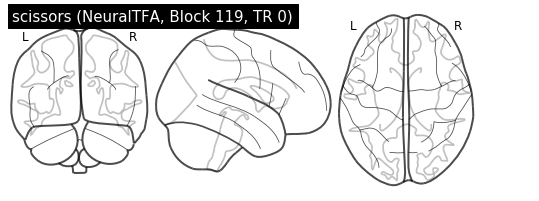

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

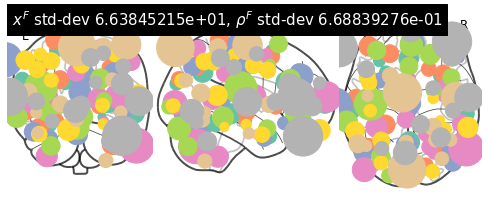

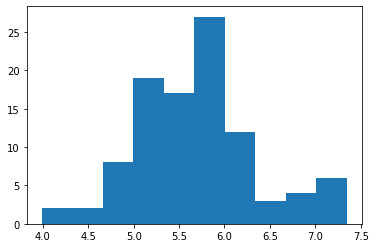

(<nilearn.plotting.displays.OrthoProjector at 0x7fa93b2af8d0>,
 tensor([[-60.9233, -28.5419,  27.4483],
         [ 36.9669, -57.7880, -24.2272],
         [ 44.2765,   1.9045,  38.3478],
         [ 29.2090,  68.4477,   2.5220],
         [ -0.7229, -60.3299,  35.8741],
         [-32.2233,  25.0186,   4.9198],
         [-31.3299, -46.8736, -20.5552],
         [-25.2920,  12.8079,  57.9539],
         [ 57.1315, -30.3229,  -8.0270],
         [ 22.9760, -53.9684, -12.0709],
         [ -1.4424,  27.1303,  25.7908],
         [-15.5656, -87.9589,  23.5684],
         [ 33.2757,   9.1864, -31.3391],
         [-24.2181, -15.4795, -15.6879],
         [ 29.8670, -64.9077,  40.5189],
         [-43.5054, -66.6166,  42.4075],
         [ 42.2282,  45.4989,  -1.9095],
         [ 19.7733,  16.5176,  -0.6620],
         [ 33.9457, -71.2983, -40.9647],
         [-43.3750,  40.2995, -24.2578],
         [-56.6341, -14.0295,  -5.8610],
         [ 35.0046,  11.7471,  52.5956],
         [-26.0336, -42.2349,  69.0

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

05/19/2020 19:48:05 Average reconstruction error (MSE): 5.04676311e+02 +/- 3.90983160e+01
05/19/2020 19:48:05 Average data norm (Euclidean): 6.03396825e+02 +/- 6.17218783e+01
05/19/2020 19:48:05 Percent average reconstruction error: 83.892902 +/- 3.37885808e+00


(array([560.34643555, 532.23400879, 501.29174805, 509.10916138,
        528.75817871, 510.61273193, 515.24047852, 483.83532715,
        557.21417236, 526.49316406, 498.54653931, 448.48562622,
        470.09039307, 487.69702148, 549.74133301, 539.68041992,
        499.29660034, 495.59286499, 469.03256226, 502.00473022,
        478.05599976, 530.83483887, 499.17901611, 511.16293335,
        615.25897217, 549.42242432, 510.23937988, 534.71887207,
        476.52850342, 513.31072998, 514.95202637, 475.17272949,
        586.99664307, 524.22662354, 467.62664795, 490.79690552,
        532.24908447, 490.43304443, 506.93548584, 538.83282471,
        597.9005127 , 498.05285645, 497.59054565, 520.21948242,
        524.49066162, 507.0385437 , 541.96813965, 489.30377197,
        521.48016357, 531.93328857, 483.28601074, 455.46395874,
        505.86471558, 554.7979126 , 518.36853027, 548.28869629,
        452.72290039, 449.61425781, 468.19299316, 447.9538269 ,
        462.30871582, 466.41687012, 431.